# Module 3: Three Sides to the Triangle

In [ ]:
!wget -O turtle_setup.py 'https://raw.githubusercontent.com/williamedwardhahn/fractal25/refs/heads/main/turtle_setup.py'
from turtle_setup import *

--2025-02-17 18:48:42--  https://raw.githubusercontent.com/williamedwardhahn/fractal25/refs/heads/main/turtle_setup.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13274 (13K) [text/plain]
Saving to: ‘turtle_setup.py’

turtle_setup.py     100%[===================>]  12.96K  --.-KB/s    in 0s      

2025-02-17 18:48:42 (86.3 MB/s) - ‘turtle_setup.py’ saved [13274/13274]



First you define a function to go a given length and turn 120 degrees to create an equilateral triangle.

In [ ]:
# Define the function to draw an equilateral triangle
def draw_triangle(length):
    for _ in range(3):
        forward(length)
        left(120)

This is an example of a basic triangle.  You refine the function, I do not know enough about Python (and my COBOL skills do not help so much anymore!) to know if you need to redefine it if it was defined and executed in a prior block.

Regardless you set the color and length, the latter of which is a requirement for the function call to create the triangle.  Changing either of those values does not do anything dramatic but I will play with it to see if I can easily make other shapes which does not have to do with the fractals I know.

Okay, this is neat.  I created the function draw_hex and I'm guessing the AI knew exactly how I would want to code it, so I let it do so!

So playing with it some more, and having just taught this to my middle school students in Geometry, I have it set to create an n-gon with a user input number of sides.  I have not used inputs before and see it coming up frequently in the future.
Frustratingly sometimes this works perfectly and sometimes it hangs.  I do not see any reason for this.

In [ ]:
initializeTurtle()
showturtle()

# Define the function to draw an equilateral triangle
def draw_triangle(length):
    for _ in range(3):
        forward(length)
        left(120)
def draw_hex(length):
    for _ in range(6):
        forward(length)
        left(60)
def draw_ngon(length, n):
    for _ in range(n):
        forward(length)
        left(360/n)

n = input("Enter number of sides: ")
# Set up the turtle
jump(300, 500)
face(90)
color('green')
length = 1200/int(n)
#draw_triangle(length)
#draw_hex(length)
draw_ngon(length,int(n) )
show()

Enter number of sides: 20


<IPython.core.display.Javascript object>

In [ ]:
# Define the recursive Sierpinski triangle function
def sierpinski_triangle(length, order,triangle_count):
    if order == 0:
        draw_triangle(length)
        triangle_count=triangle_count+1
    else:
        color=cycle(colours)
        sierpinski_triangle(length / 2, order - 1,triangle_count)
        print('path 1',order,length)
        triangle_count=triangle_count+1
        forward(length / 2)
        sierpinski_triangle(length / 2, order - 1,triangle_count)
        print('path 2',order,length)
        triangle_count=triangle_count+1
        backward(length / 2)
        left(60)
        forward(length / 2)
        right(60)
        sierpinski_triangle(length / 2, order - 1,triangle_count)
        print('path 3',order,length)
        triangle_count=triangle_count+1
        left(60)
        backward(length / 2)
        right(60)


I want to make sure I take this slow to fully understand it.  Setting the order to 0 a basic triangle is created which happens in the first branch of the IF statement, drawing a triangle.

The strangest aspect of this is calling the function from within the function.  In COBOL I don't think this is possible, or at least I had never had need to do it so had to look it up and it is of course called recursion.  Reading into the hazards of recursion, it explains why I ran out of memory when I simply increased the order by 1 on the last assignment, it creates an exponential number of processes.
I wanted to cycle through colors so looked up code how to do it.  It is proving challenging, but hope to see how the recursion works through changes of colors.

Since the colors is not working, I am dumping the order and lengths of triangles for each iteration to see the order in which the triangles are drawn.  I also added an input to the function to count the triangles rather than just list them all but that is not working either, I'm regularly being given an output of 0.

The way the triangle is defined is that the order reduces and length are reduced until equal to 0 and a triangle of the appropriate length is drawn.  This happens repeatedly

In [ ]:
initializeTurtle()
showturtle()
triangle_count=0
from itertools import cycle
colours = cycle(['red', 'green', 'pruple', 'blue','orange','black'])

# Set up the turtle
jump(300, 500)
face(90)
#color('green')

# Draw the Sierpinski triangle
length = 400
order = 3
sierpinski_triangle(length, order,triangle_count)
print(triangle_count)

show()

path 1 1 100.0
path 2 1 100.0
path 3 1 100.0
path 1 2 200.0
path 1 1 100.0
path 2 1 100.0
path 3 1 100.0
path 2 2 200.0
path 1 1 100.0
path 2 1 100.0
path 3 1 100.0
path 3 2 200.0
path 1 3 400
path 1 1 100.0
path 2 1 100.0
path 3 1 100.0
path 1 2 200.0
path 1 1 100.0
path 2 1 100.0
path 3 1 100.0
path 2 2 200.0
path 1 1 100.0
path 2 1 100.0
path 3 1 100.0
path 3 2 200.0
path 2 3 400
path 1 1 100.0
path 2 1 100.0
path 3 1 100.0
path 1 2 200.0
path 1 1 100.0
path 2 1 100.0
path 3 1 100.0
path 2 2 200.0
path 1 1 100.0
path 2 1 100.0
path 3 1 100.0
path 3 2 200.0
path 3 3 400
0


<IPython.core.display.Javascript object>

# Cellular Automata

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'PuRd')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

I was playing with the color and hit an error for unsupported value.  It gave me a partial list of valid values and these look fun.  I am assuming this is specific to the numpy or matplotlib libraries and not party of native Python:

supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Grays_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'berlin', 'berlin_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_grey_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gist_yerg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'grey_r', 'hot', 'hot_r', 'hsv', 'h...


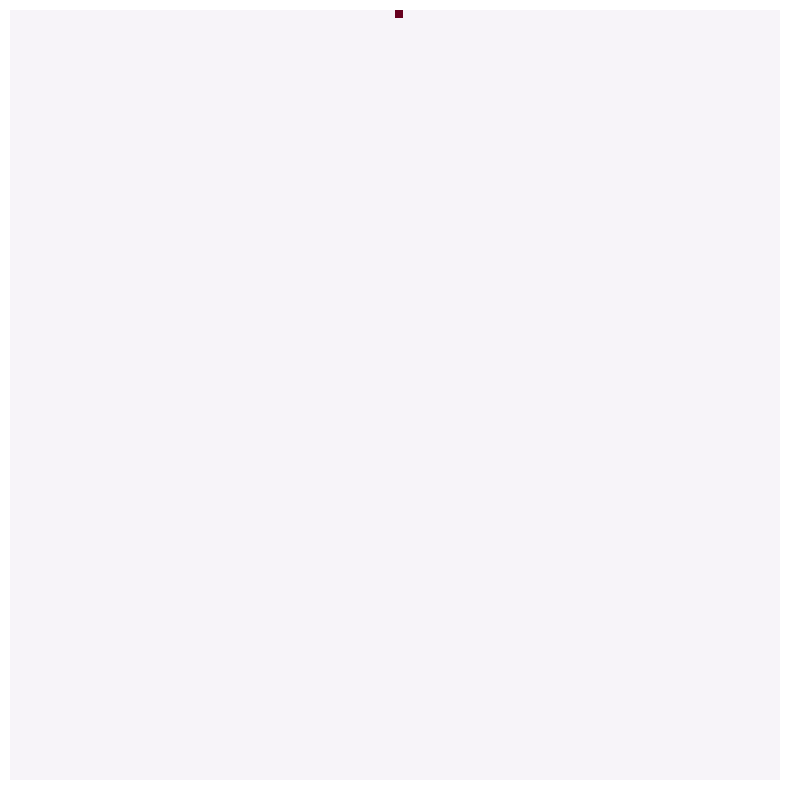

In [ ]:
C = np.zeros((100,100)).astype(int)
C[0,50] = 1
plot(C)

In [ ]:
num = 52
print(f'{num:08b}')

00110100


The above converts the given num into binary.

In [ ]:
rule = np.zeros((2,2,2))

rule[0,0,0] = 0
rule[0,0,1] = 1
rule[0,1,0] = 0
rule[0,1,1] = 1
rule[1,0,0] = 1
rule[1,0,1] = 0
rule[1,1,0] = 1
rule[1,1,1] = 0

The above defines the rules for determining if adjacent cells to a given cell is occupited and the results being positive or negative for placment of a new cell.  The rules are called Rule 30 derived by Stephen Wolfram and looks to tie to the chaos theory that I studied last year.

The function below looks at the cells above it, above and to the left of it, and above and to the right of it to determined if it should be filled based on the defined rules.

In [ ]:
def CA(X):

    for i in range(1,X.shape[0]-1): #row
        for j in range(1,X.shape[1]-1): #col

            N  = X[i-1,j]
            NW = X[i-1,j-1]
            NE = X[i-1,j+1]

            X[i,j] = rule[NW,N,NE]

    return X

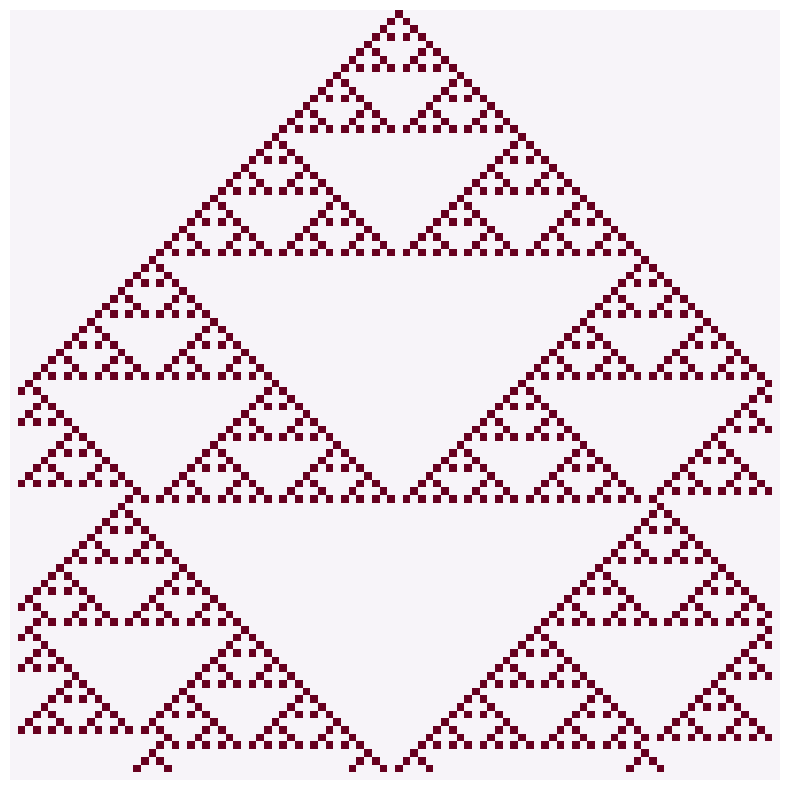

In [ ]:
plot(CA(C))

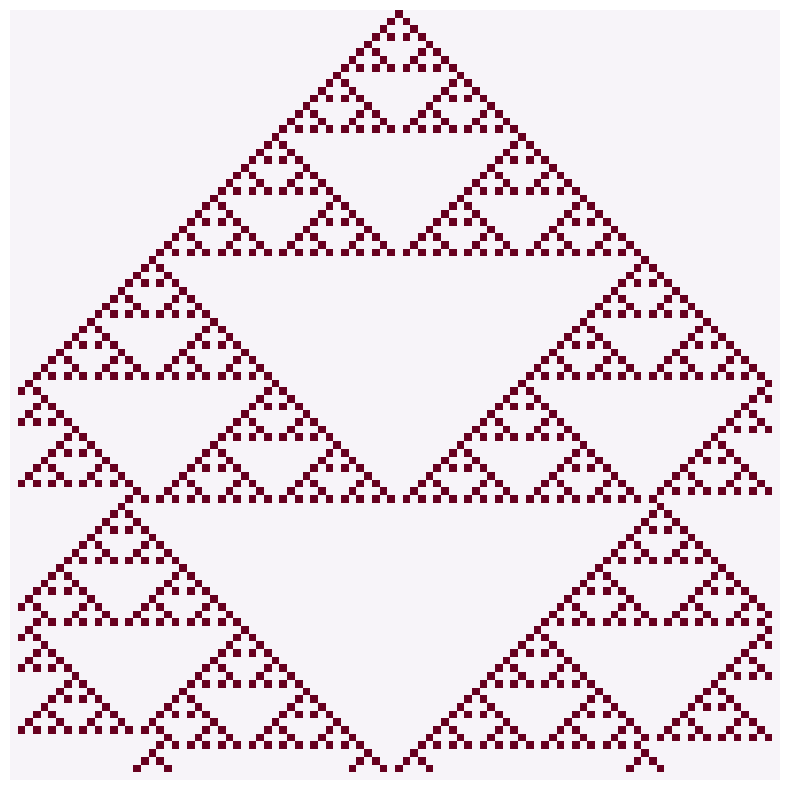

In [ ]:
def CA(X):

    for i in range(1,X.shape[0]-1): #row
        for j in range(1,X.shape[1]-1): #col

            X[i,j] = (rule/(2**(4*X[i-1,j-1] + 2*X[i-1,j] + X[i-1,j+1]))) % 2

    return X

rule = 90

plot(CA(C))

For the execution above, which is duplicated in the third run below, the rules for the cells that are checked are different.

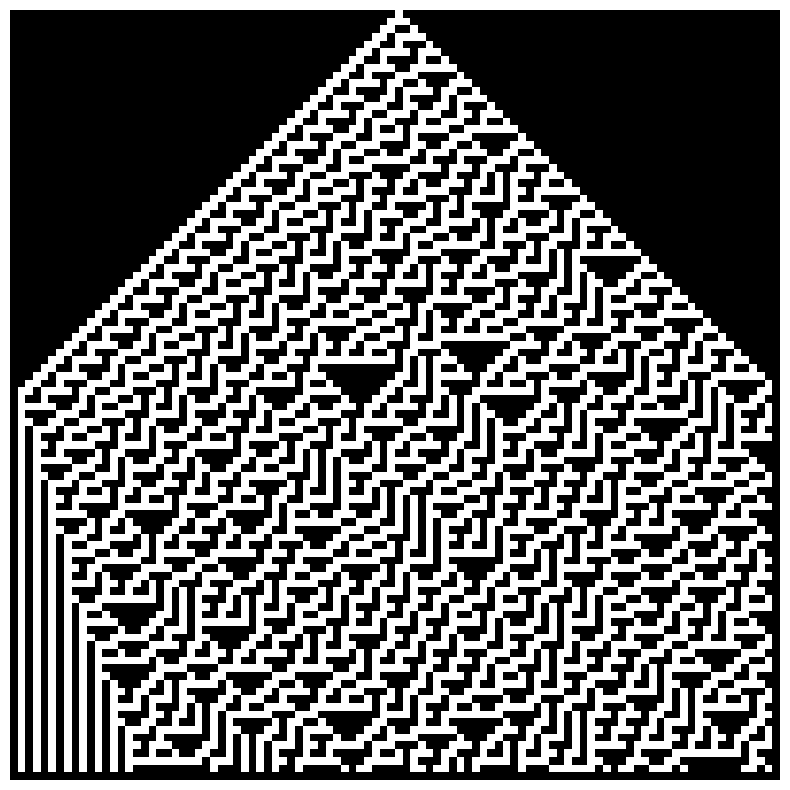

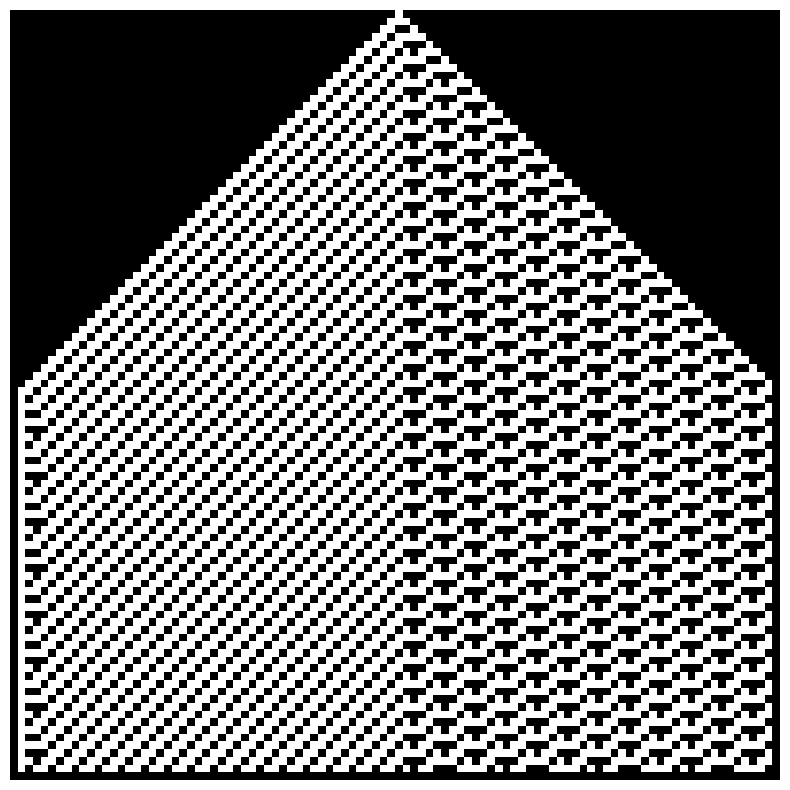

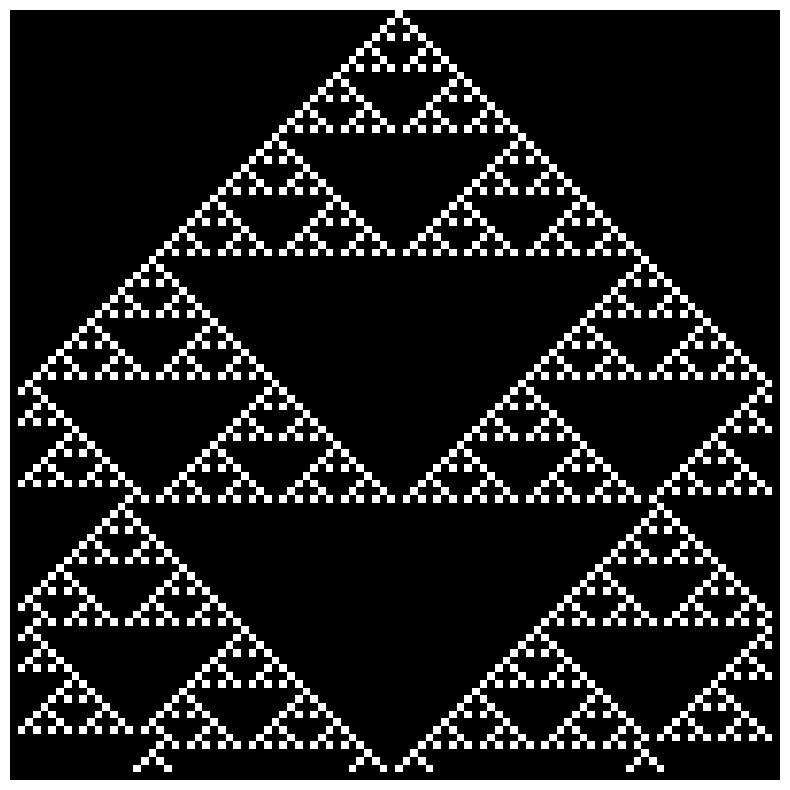

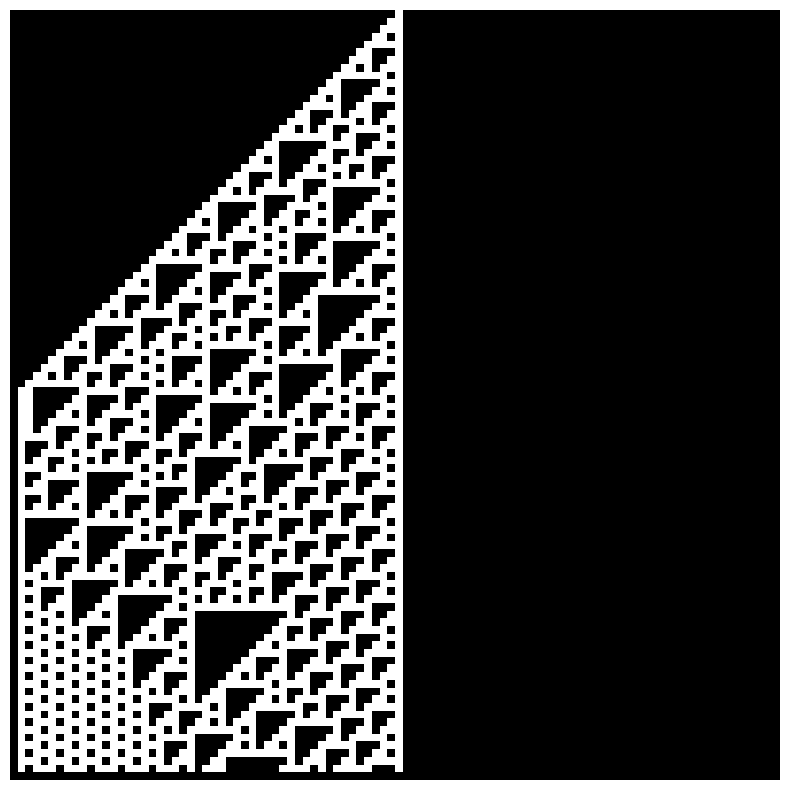

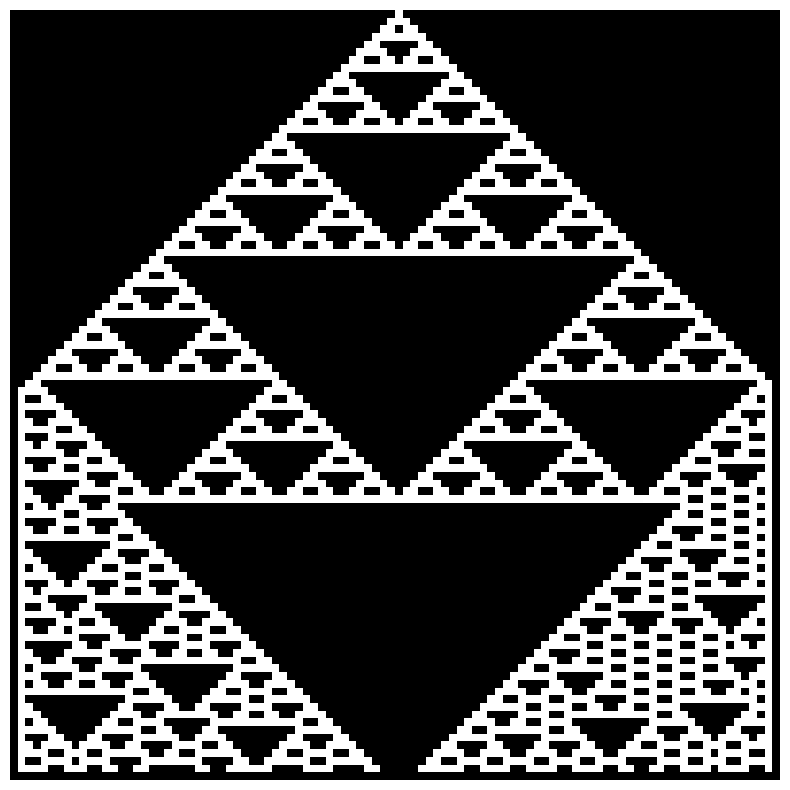

In [ ]:
for rule in [30, 62, 90, 110, 126]:
    plot(CA(C))